# Data Augmentation
To ensure model robustness and prevent overfitting, the dataset underwent extensive preprocessing. A separate augmentation pipeline was developed to address data scarcity and improve generalization.

Augmentation Strategy:


Rotation & Shifting: Random rotations up to 40° and width/height shifts of 20% to account for varying photo angles.


Shear & Zoom: Applied shear transformations and zooming (20%) to simulate different camera distances.


Horizontal Flips: To ensure the model remains invariant to the orientation of the skin lesion.

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class_list = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']

In [ ]:
def show_image(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (100,100))
  plt.imshow(img)

In [ ]:
# data Augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

path_train="/content/drive/MyDrive/Data/DATA/train/"
path_test="/content/drive/MyDrive/Data/DATA/testing/"

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def generate_augmented_images(datagen, data_dir, batch_size=20):
    classes = os.listdir(data_dir)
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        images = os.listdir(class_dir)
        for img_name in images:
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=class_dir, save_prefix=img_name.split('.')[0], save_format='jpeg'):
                i += 1
                if i >= batch_size:
                    break

In [ ]:

# to generate augmented images for training dataset
generate_augmented_images(datagen, path_train)

# to generate augmented images for testing dataset
generate_augmented_images(datagen, path_test)

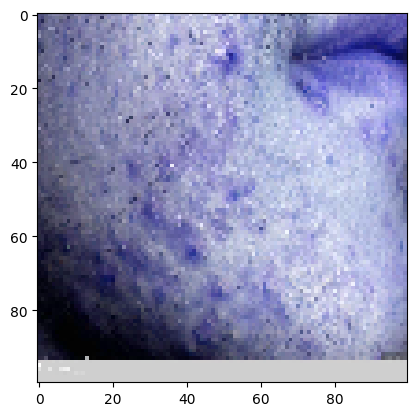

In [ ]:
show_image("/content/drive/MyDrive/Data/DATA/train/Acne/033007HB.jpg")